# Credit Card Fraud Detection

## 1. Data Understanding and Inspection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
card = pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
card.shape

(284807, 31)

In [8]:
# percentage of missing values in each column
round(100 * (card.isnull().sum()/len(card)),2).sort_values(ascending= False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [9]:
# percentage of missing values in each row
round(100 * (card.isnull().sum(axis=1)/len(card)),2).sort_values(ascending= False)

0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

##### Note : there's no missing/null value in columns or rows

#### Check for Duplicates

In [12]:
card_d = card.copy()
card_d.drop_duplicates(subset=None, inplace= True)

In [13]:
card.shape

(284807, 31)

In [14]:
card_d.shape

(283726, 31)

##### Note : Duplicates are found in the record

In [16]:
card = card_d
card.shape

(283726, 31)

In [17]:
card.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## 2. Exploratory Data Analysis

In [19]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

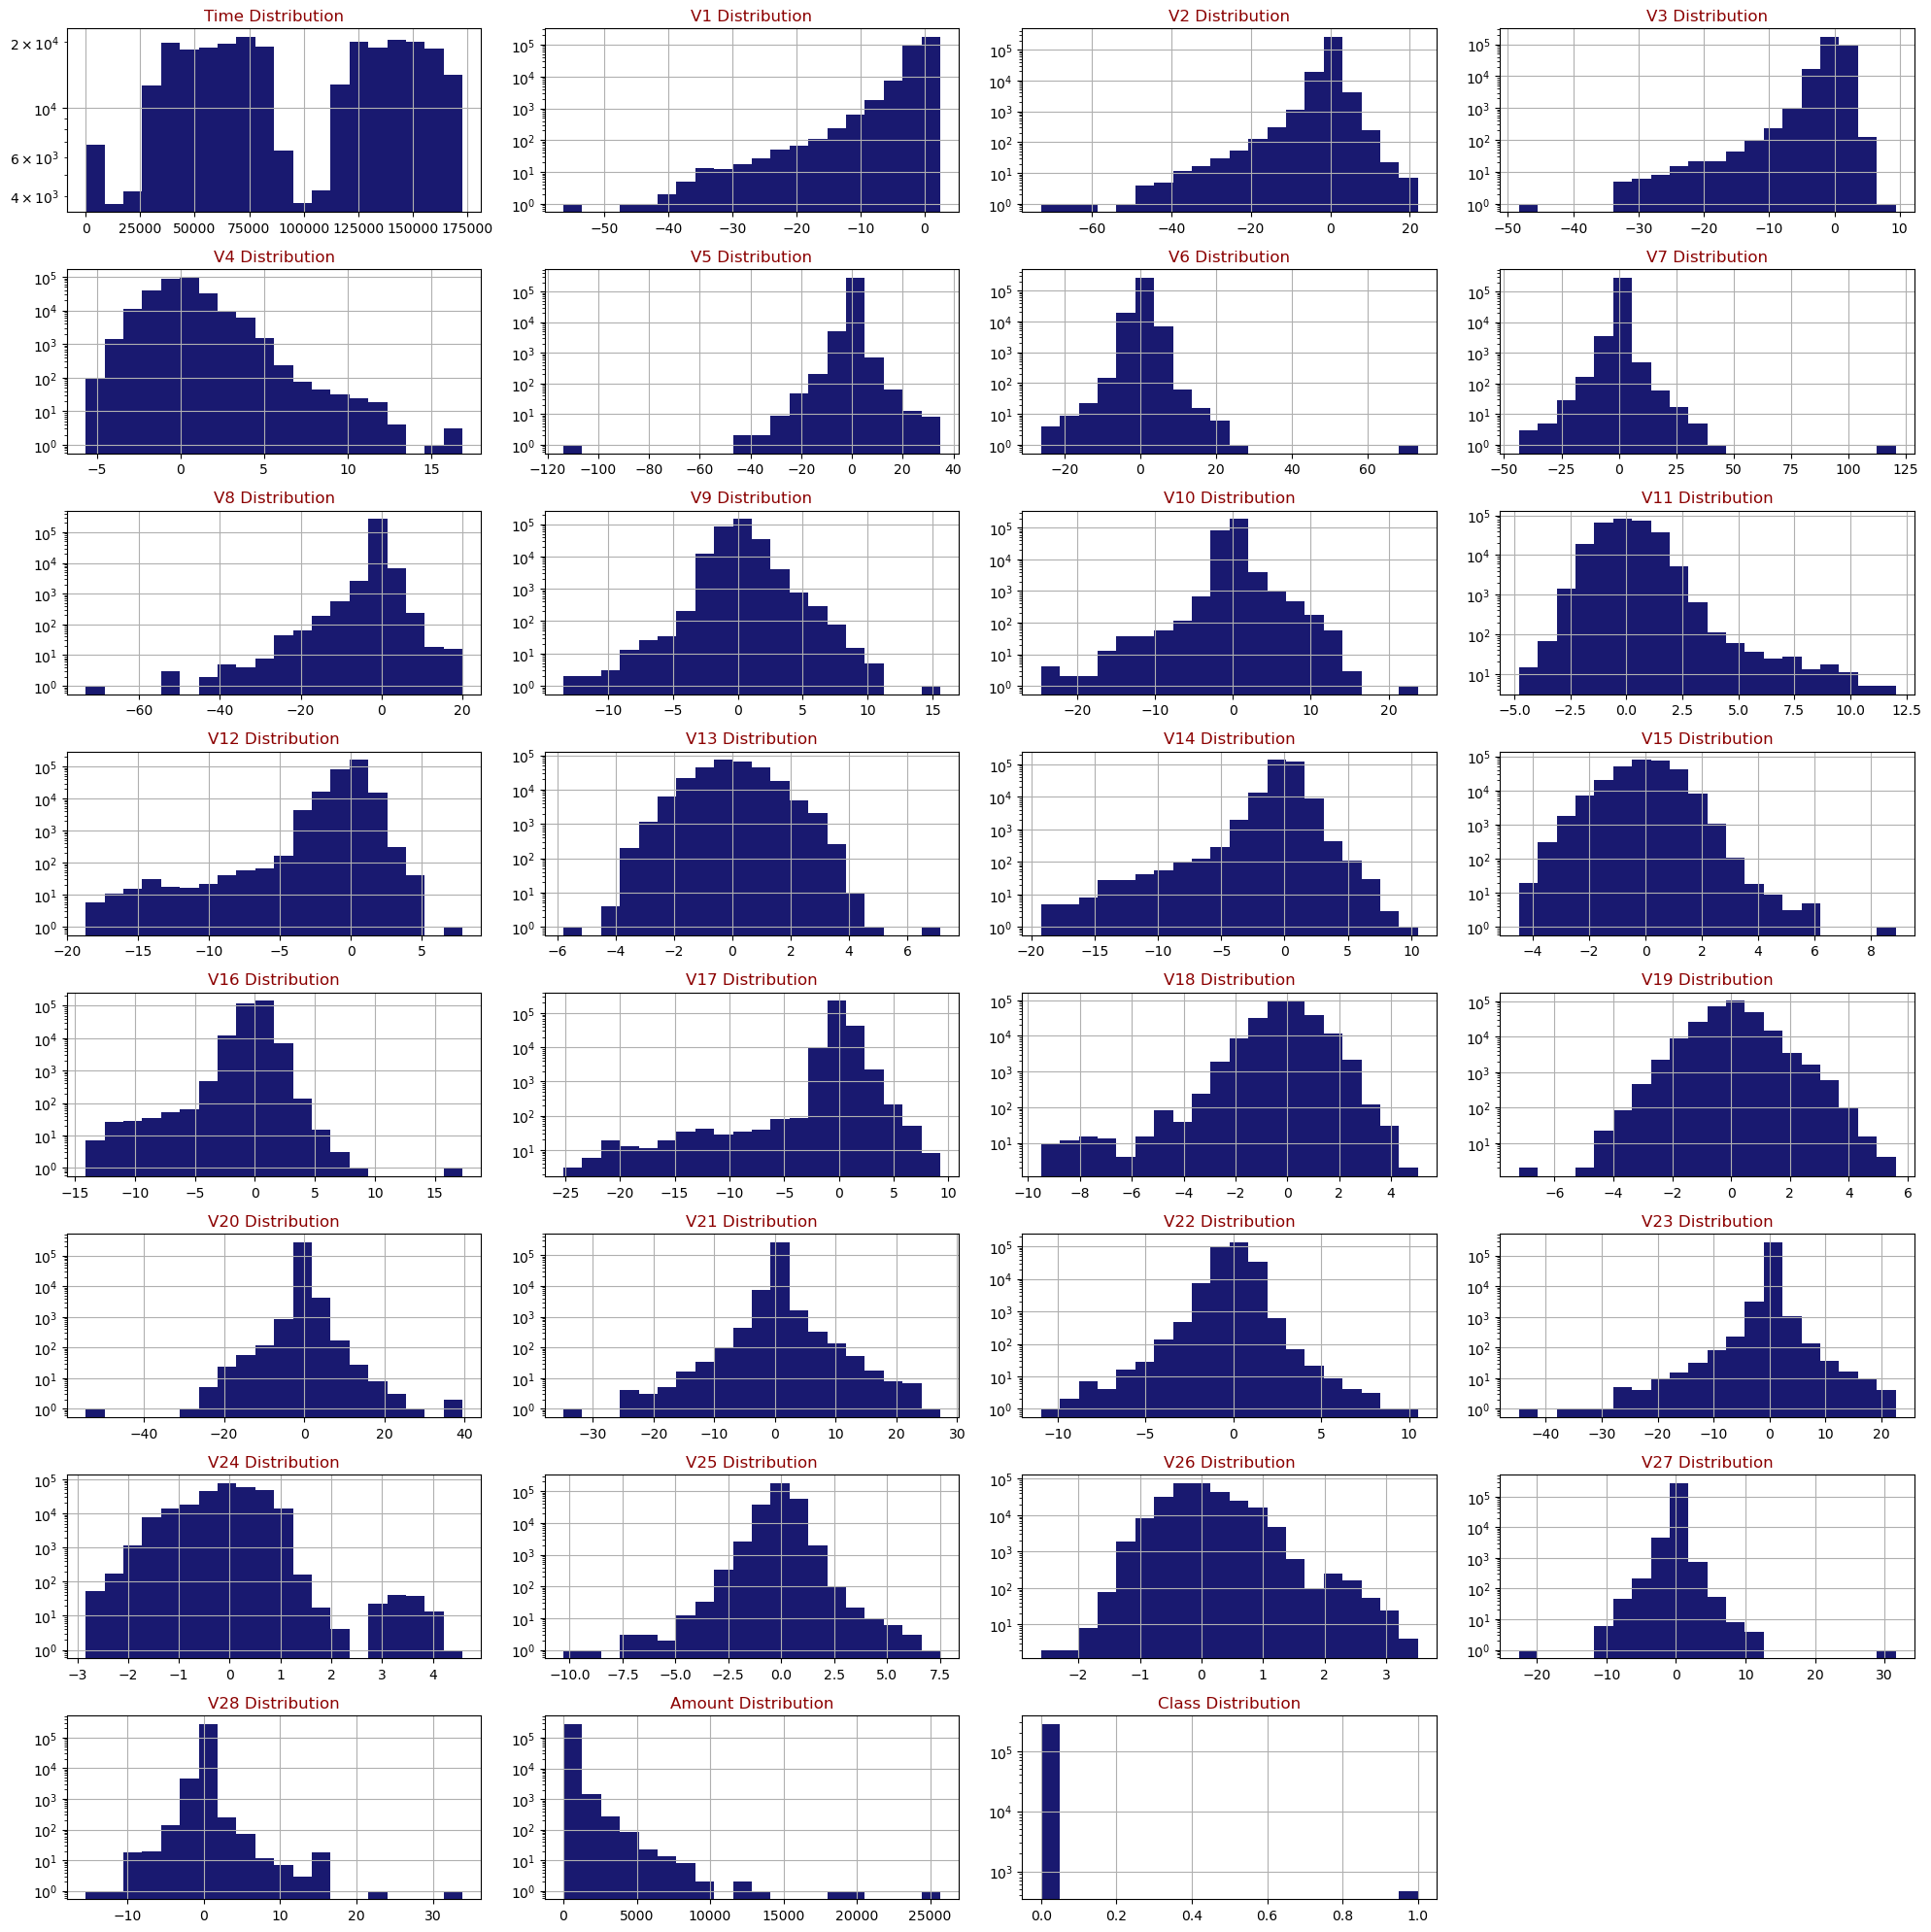

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor= 'midnightblue')
        ax.set_title(feature+" Distribution", color ='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(card,card.columns, 8, 4)

In [21]:
card.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

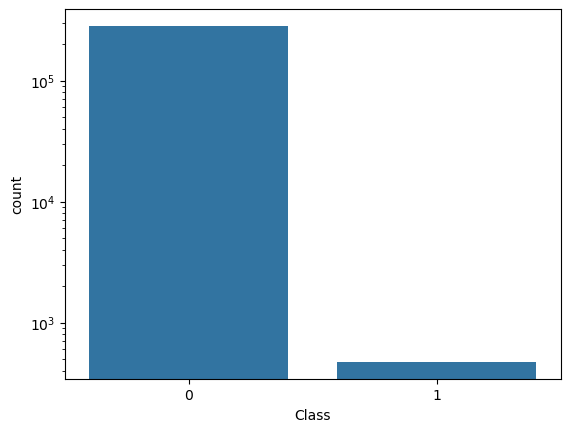

In [22]:
ax = sns.countplot(x="Class",data=card);
ax.set_yscale('log')

##### Note :there are 283253 records with no fraud status and 473 records with fraud status

#### Correlation Matrix

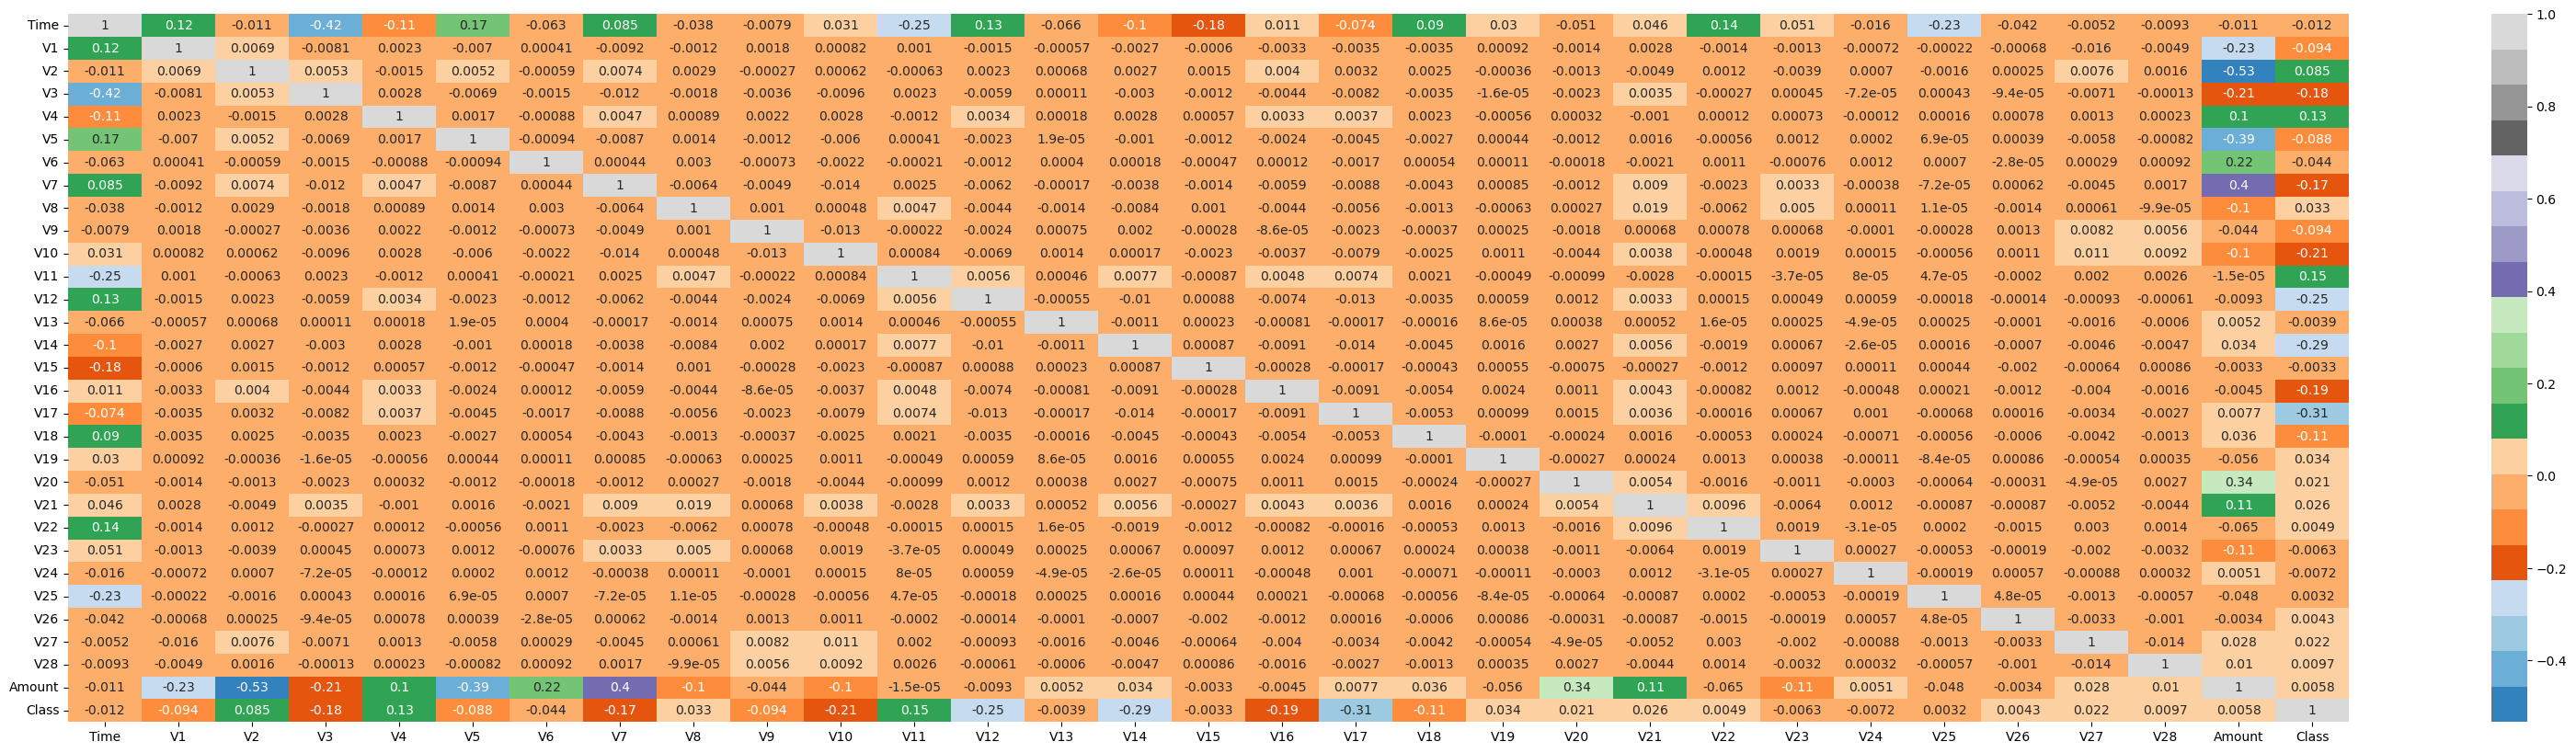

In [25]:
plt.figure(figsize = (40,10))
sns.heatmap(card.corr(), annot=True, cmap = "tab20c")
plt.show()

##### Note
##### The heatmap clearly shows which variables are multicollinear in nature, and which variable have high collinearity with the target variable
##### We will refer this map back_and_forth while building the linear model to validate different correlated calues along with p_value, for identifying the correct variable to select/eliminate from the model.

## 3. Modeling with a Logistic Regression

In [28]:
card.shape

(283726, 31)

In [29]:
card.info()
card.columns

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [30]:
X1 = card.iloc[:, :-1]
y = card.iloc[:, -1]

In [31]:
col = X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

#### Using SM(Stats Model's Log Reg) instead of Sk-Learn

In [33]:
X= sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [34]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.6819
Time:                        16:09:40   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Notes:
##### The rsults above show some of the attributes with p-value higher than the threshhold alpha(5%) and thereby showing low statistically significant relationship with the probability of fraud.
##### Backward elimination method is used to remove those attributes with highest P-Value one at a time followed by running the regression repeatedly untill all attributes have P-Values less than 0.05


In [36]:
def back_feature_elim(data_frame, dep_var, col_list):
    '''Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest P-Value above alpha one at a time and returns the regression summary with all p_values below alpha'''
    while len(col_list)>0 :
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elim(X, card.Class, col)

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                 0.03183
Time:                        16:09:48   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [39]:
new_features = card[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20',
       'V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x= new_features.iloc[:,:-1]
y= new_features.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42, stratify = y)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

## 4. Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9991541254009093


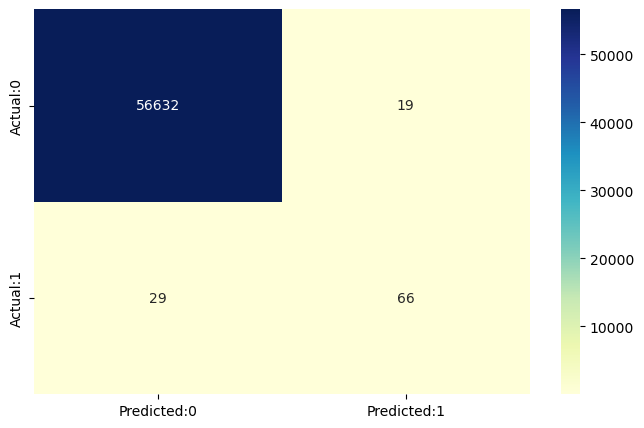

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize= (8,5))
sns.heatmap(conf_matrix, fmt='d', annot=True, cmap = "YlGnBu");

The confusin matrix shows 56632+66 = 56698 correct predictions and 19+29= 48 incorrect ones

True Positives: 66

True Negatives: 56632


False Positives: 19 (Type 1 error)

False Negatives: 29 (Type 2 Error)


In [85]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP) 

## 4.1 Model Evaluation, Statistics

In [89]:
print('THe accuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',TP+TN/(TP+TN+FP+FN), '\n',
      'The Missclassification = 1-Accuracy =                      ',1 -(TP+TN/(TP+TN+FP+FN)),'\n',
      'Sensitivity or True Positive Rate =                        ',TP/float(TP+FN),'\n',
      'Specificity or True Negative Rate =                        ',TN/float(TN+FP),'\n',
      'Positive predictive Value = TP/(TP+FP)                     ',TP/float(TP+FP),'\n',
      'Negative predictive Value = TP/(TP+FP)                     ',TN/float(TN+FN),'\n',
      'Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  ',sensitivity/(1-specificity),'\n',
      'Negative Likelihood Ratio = (1-Sensitivity)/Specificity =  ',(1-sensitivity)/specificity
     )

THe accuracy of the model = TP+TN/(TP+TN+FP+FN) =           66.99799104782716 
 The Missclassification = 1-Accuracy =                       -65.99799104782716 
 Sensitivity or True Positive Rate =                         0.6947368421052632 
 Specificity or True Negative Rate =                         0.9996646131577553 
 Positive predictive Value = TP/(TP+FP)                      0.7764705882352941 
 Negative predictive Value = TP/(TP+FP)                      0.9994881841125289 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =   2071.4493074790057 
 Negative Likelihood Ratio = (1-Sensitivity)/Specificity =   0.30536557349015986


From the above statistics it is clear that the model is more highly specific than sensitive.
The negative values are predicted more accurately than the positives

In [94]:
y_pred_prob = logreg.predict_proba(x_test)[:,:]
y_pred_prob_df= pd.DataFrame(data=y_pred_prob, columns=['Prob of not Fraud(0)','Prob of Fraud(1)'])
y_pred_prob_df.head()

,Prob of not Fraud(0),Prob of Fraud(1)
0,0.999124,0.000876
1,0.999999,0.000001
2,0.999667,0.000333
3,0.999439,0.000561
4,0.999835,0.000165


## Predicted probabilities of 0 (NO FRAUD) and 1 (FRAUD) for the test data with a default classification threshold of 0.5

In [109]:
# Looping through thresholds from 0 to 1 in steps of 0.1
for i in range(0, 11):
    threshold = i / 50

    # Predict probabilities for the positive class (Fraud = 1)
    y_pred_prob_yes = logreg.predict_proba(x_test)[:, 1]
    
    # Apply threshold to convert probabilities to binary predictions
    y_pred2 = (y_pred_prob_yes >= threshold).astype(int)

    # Generate the confusion matrix
    cm2 = confusion_matrix(y_test, y_pred2)

    # Calculate Sensitivity and Specificity
    sensitivity = cm2[1, 1] / (cm2[1, 1] + cm2[1, 0]) if cm2[1, 1] + cm2[1, 0] != 0 else 0
    specificity = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1]) if cm2[0, 0] + cm2[0, 1] != 0 else 0

    # Print the results
    print(f"With {threshold} threshold, the Confusion Matrix is:\n{cm2}\n")
    print(f"With {cm2[0, 0] + cm2[1, 1]} correct predictions and {cm2[1, 0]} Type II errors (False Negatives)\n")
    print(f"Sensitivity: {sensitivity}, Specificity: {specificity}\n\n")


With 0.0 threshold, the Confusion Matrix is:
[[    0 56651]
 [    0    95]]

With 95 correct predictions and 0 Type II errors (False Negatives)

Sensitivity: 1.0, Specificity: 0.0


With 0.02 threshold, the Confusion Matrix is:
[[55814   837]
 [   22    73]]

With 55887 correct predictions and 22 Type II errors (False Negatives)

Sensitivity: 0.7684210526315789, Specificity: 0.9852253270021711


With 0.04 threshold, the Confusion Matrix is:
[[56174   477]
 [   22    73]]

With 56247 correct predictions and 22 Type II errors (False Negatives)

Sensitivity: 0.7684210526315789, Specificity: 0.9915800250657535


With 0.06 threshold, the Confusion Matrix is:
[[56350   301]
 [   22    73]]

With 56423 correct predictions and 22 Type II errors (False Negatives)

Sensitivity: 0.7684210526315789, Specificity: 0.9946867663412826


With 0.08 threshold, the Confusion Matrix is:
[[56445   206]
 [   23    72]]

With 56517 correct predictions and 23 Type II errors (False Negatives)

Sensitivity: 0.75

## ROC Curve

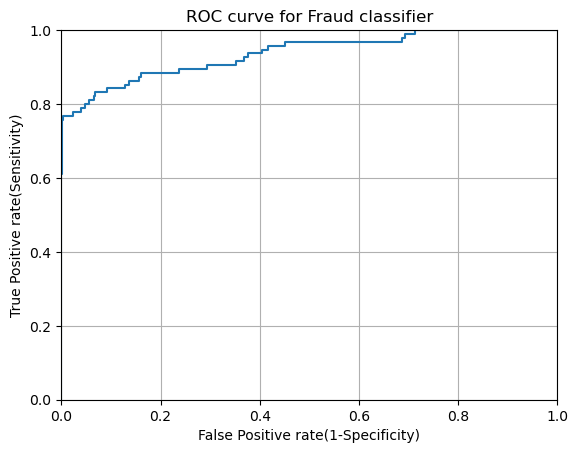

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False Positive rate(1-Specificity)')
plt.ylabel('True Positive rate(Sensitivity)')
plt.grid(True)




In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob_yes)

0.9370541143418288

## Conclusion

- All attribites selected after the elimination process show p-values lower than 5% and thereby suggesting significant role in the fraud Prediction.

- The Area under the ROC curve is 93.72 which is good

- Overall model could be improved with more data